In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

# Minimax on a convex/concave function

x²-y²

In [36]:
# z = (x,y)
def L(z):
    return z[0]**2 - z[1]**2

def F(z):
    return np.array([2*z[0], 2*z[1]])

In [37]:
def plot_trajectory(points, update_directions, max_iters, title, nb_arrows = 10, line_color = 'b'):
    """Plot the trajectory in the x-y plane of a DTA. 
        INPUT:
            points: list of np.array, each corresponding to one point at one iteration
            grads : list of np.array, each corresponding to the direction to the next iterate"""
            
    xs = [z[0] for z in points]
    ys = [z[1] for z in points]
    plt.rcParams["figure.figsize"] = (8,8)
    plt.scatter(xs[0], ys[0], color = 'r', lw = 3, label = "Starting point")
    plt.scatter(0, 0, color = 'k', lw = 2, label = "Minimum point", marker='*')
    plt.plot(xs, ys, color = line_color, label = 'Trajectory')

    # Add gradient arrows
    scale = 0.2
    x_grads = [z[0] for z in update_directions]
    y_grads = [z[1] for z in update_directions]
    for i in range(0, max_iters, int(max_iters/nb_arrows)):
        plt.arrow(xs[i], ys[i], scale*x_grads[i], scale*y_grads[i], lw = 1.5, head_width = 0.05, color = line_color)

    ax_lim = 4
    plt.xlim(-ax_lim,ax_lim)
    plt.ylim(-ax_lim,ax_lim)
    plt.legend(loc = 'upper right')
    if title is not None:
        plt.suptitle(title) 

# GDA

In [54]:
def GDA(z0, gamma, max_iters, plot = True):
    """Gradient Descent Ascent algorithm"""
    points = []
    update_directions = []

    z = np.copy(z0)
    #timer = time.time()
    for n_iter in range(max_iters):
        points.append(np.copy(z))
        # Compute update direction
        update_direction = -F(z)
        update_directions.append(np.copy(update_direction))

        # Update z with the algorithm
        z += gamma * update_direction
    print(points[len(points)-1])
    #print(timer)
    if plot:
        plot_trajectory(points, update_directions, max_iters, title = 'GDA trajectory for L(x,y) = xy', line_color='b')

    return points, update_directions

[1.51115727e-16 1.51115727e-16]


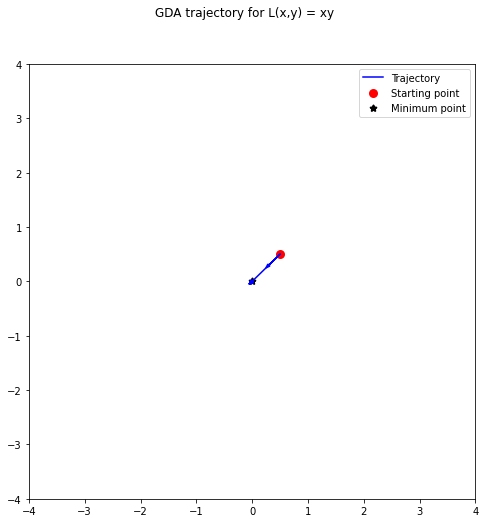

In [56]:
z0 = np.array([0.5,.5])
gamma = 0.3
max_iters = 40

points, update_directions = GDA(z0, gamma, max_iters)

# EGM

In [40]:
def EGM(z0, gamma, max_iters, plot = True):
    """Extra Gradient Method"""
    points = []
    update_directions = []

    z = np.copy(z0)
    z_t = np.copy(z0)
    
    #timer = time.time()
    for n_iter in range(max_iters):
        points.append(np.copy(z))
        # Update intermediary point
        grad_z = F(z)
        z_t = z - gamma*grad_z

        # Update next point
        update_direction = -F(z_t)
        z += gamma*update_direction

        update_directions.append(np.copy(update_direction))
    print(points[len(points)-1]) 
    #print(timer)

    if plot:
        plot_trajectory(points, update_directions, max_iters, 'EGM trajectory for L(x,y) = xy', nb_arrows = 15, line_color='g')

    return points, update_directions

[7.9344283e-13 7.9344283e-13]


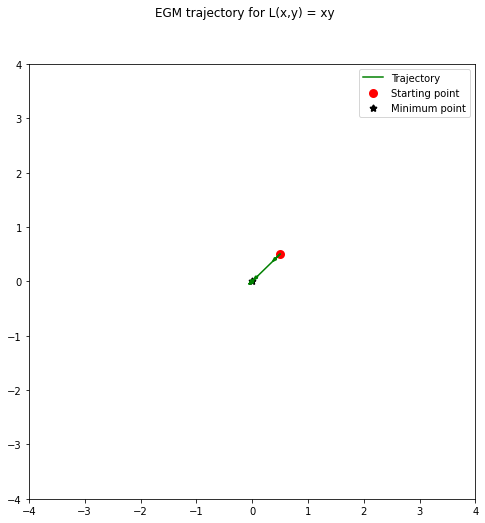

In [41]:
z0 = np.array([.5,.5])
gamma = 0.3
max_iters = 100

points, update_directions = EGM(z0, gamma, max_iters)

# OGDA

In [42]:
def OGDA(z0, gamma, max_iters, plot = True):
    """Optimistic Gradient Descent Ascent Method"""
    points = []
    update_directions = []

    z = np.copy(z0)
    
    # First iteration
    points.append(np.copy(z))
    # Compute update direction
    update_direction = -F(z)
    update_directions.append(np.copy(update_direction))

    # Update z with the algorithm
    z += gamma * update_direction

    # Rest of the iterations
    #timer = time.time()
    for n_iter in range(1,max_iters):
        points.append(np.copy(z))
        # Update next iterate point
        grad_z = F(z)
        grad_z_minus_1 = F(points[n_iter - 1])

        update_direction = -2 * grad_z + grad_z_minus_1
        update_directions.append(update_direction)

        z += gamma*update_direction
    print(points[len(points)-1])
    #print(timer)
    
    if plot:
        plot_trajectory(points, update_directions, max_iters, 'OGDA trajectory for L(x,y) = xy', nb_arrows = 15, line_color='orange')

    return points, update_directions

[0.52 0.52]
[0.136 0.136]
[0.2848 0.2848]
[0.02464 0.02464]
[0.165952 0.165952]
[-0.0184064 -0.0184064]
[0.10325248 0.10325248]
[-0.03169434 -0.03169434]
[0.06829036 0.06829036]
[-0.03267467 -0.03267467]
[0.04750915 0.04750915]
[-0.02910663 -0.02910663]
[0.03432682 0.03432682]
[-0.02432934 -0.02432934]
[0.02546196 0.02546196]
[-0.01969 -0.01969]
[0.01921517 0.01921517]
[-0.01565703 -0.01565703]
[0.01466051 0.01466051]
[-0.01232632 -0.01232632]
[0.01126157 0.01126157]
[-0.00964811 -0.00964811]
[0.00868656 0.00868656]
[-0.00752618 -0.00752618]
[0.00671717 0.00671717]
[-0.00585914 -0.00585914]
[0.00520213 0.00520213]
[-0.00455591 -0.00455591]
[0.00403246 0.00403246]
[-0.00354004 -0.00354004]
[0.00312748 0.00312748]
[-0.00274952 -0.00274952]
[0.0024264 0.0024264]
[-0.00213499 -0.00213499]
[0.00188284 0.00188284]
[-0.00165756 -0.00165756]
[0.00146121 0.00146121]
[-0.00128678 -0.00128678]
[0.00113408 0.00113408]
[-0.00099888 -0.00099888]
[0.00088023 0.00088023]
[-0.00077538 -0.00077538]
[0.0

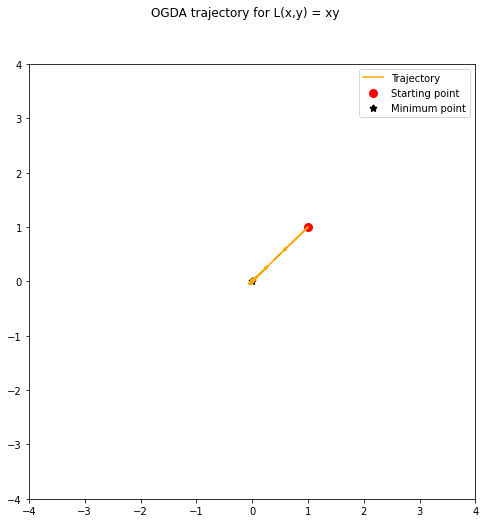

In [44]:
z0 = np.array([1.,1.])
gamma = 0.3
max_iters = 50

points, update_directions = OGDA(z0, gamma, max_iters)

# Jacobian method

In [51]:
def Grad_F(z):
    return np.array([[2, 0],[0, 2]])

In [52]:
def JM(z0, gamma, max_iters, plot = True):
    """Jacobian Method"""
    points = []
    update_directions = []

    z = np.copy(z0)
    
    #timer = time.time()
    for n_iter in range(max_iters):
        points.append(np.copy(z))
        # Update next iterate point
        grad_z = F(z)
        grad_F = Grad_F(z)

        update_direction = grad_F @ grad_z
        update_directions.append(update_direction)

        z += gamma*update_direction
    print(points[len(points)-1])
    #print(timer)
    
    if plot:
        plot_trajectory(points, update_directions, max_iters, 'JM trajectory for L(x,y) = xy', nb_arrows = 2, line_color='yellow')

    return points, update_directions

[7.94045523e+33 7.94045523e+33]


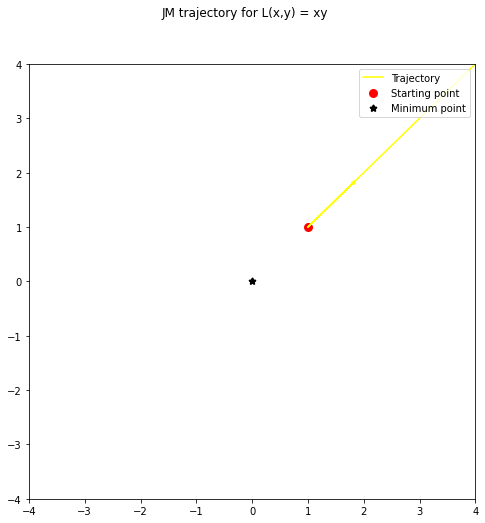

In [53]:
z0 = np.array([1.,1.])
gamma = 0.3
max_iters = 100

points, update_directions = JM(z0, gamma, max_iters)